In [39]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"

In [ ]:
!unzip "/content/drive/MyDrive/New_Dataset.zip" -d "/content/drive/MyDrive/Project02"

In [80]:
# Define paths
TRAINING_DIR = "/content/drive/MyDrive/Project02/Training/"
TESTING_DIR = "/content/drive/MyDrive/Project02/Validation"


# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_DIR))} folders for training")
print(f"There are {len(os.listdir(TESTING_DIR))} folders for testing")




There are 2 folders for training
There are 2 folders for testing


In [86]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory= VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [87]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 552 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


In [88]:
# GRADED FUNCTION: create_model
def create_model():
  # USE AT LEAST 3 CONVOLUTION LAYERS

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
  ])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy']) 

  return model


Now it is time to train your model!

**Note:** You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [89]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)


Epoch 1/20
 6/35 [====>.........................] - ETA: 3s - loss: 1.3157 - accuracy: 0.4773

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/35 [==============================] - 10s 267ms/step - loss: 0.7807 - accuracy: 0.5670 - val_loss: 0.6524 - val_accuracy: 0.6414
Epoch 2/20
35/35 [==============================] - 10s 273ms/step - loss: 0.5466 - accuracy: 0.7355 - val_loss: 0.6077 - val_accuracy: 0.7172
Epoch 3/20
35/35 [==============================] - 9s 266ms/step - loss: 0.4383 - accuracy: 0.8225 - val_loss: 0.6028 - val_accuracy: 0.7517
Epoch 4/20
35/35 [==============================] - 9s 262ms/step - loss: 0.3269 - accuracy: 0.8514 - val_loss: 0.7124 - val_accuracy: 0.7517
Epoch 5/20
35/35 [==============================] - 9s 258ms/step - loss: 0.3132 - accuracy: 0.8750 - val_loss: 0.7153 - val_accuracy: 0.7517
Epoch 6/20
35/35 [==============================] - 9s 264ms/step - loss: 0.1901 - accuracy: 0.9221 - val_loss: 0.6567 - val_accuracy: 0.7586
Epoch 7/20
35/35 [==============================] - 9s 263ms/step - loss: 0.1334 - accuracy: 0.9529 - val_loss: 0.7629 - val_accuracy: 0.7586
Epoch 8/20
35/3

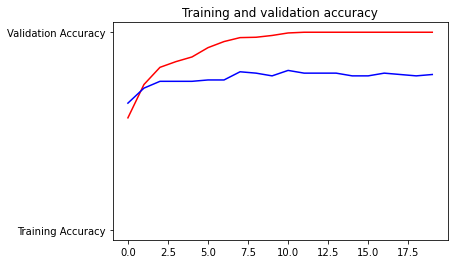

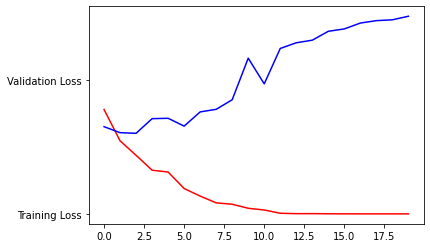

In [90]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [91]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/my_model/assets


In [92]:
import pathlib

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/saved_model/my_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

37981968

In [93]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')
# Check its architecture
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 17, 17, 64)     

In [94]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Project02/Test/1paper.png', target_size = (150, 150))
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'Kertas'
    print(prediction)
else:
    prediction = 'Buku'
    print(prediction)


Kertas


In [95]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>